# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd
import matplotlib.pyplot as plot


## 1. Read in the file using pandas, and look at the first five rows

* *Tip: You will probably need to pip install something to make this Excel file work!*

In [2]:
df = pd.read_excel('KyotoFullFlower7.xls', skiprows=25)

## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add **a parameter to make sure your columns look right**. How can you tell pandas to skip rows?

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [3]:
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [4]:
df.tail(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some NaN values

It looks like you should have NaN/missing values in the beginning of the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

* *Tip: it's another open with reading in the file!*

In [5]:
df = pd.read_excel('KyotoFullFlower7.xls', skiprows=25, na_values='-')
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 5. What reference is the most commonly used when figuring out cherry blossom flowering dates?

If the first result is `"-"`, you need to redo the last question.

In [6]:
df['Reference Name'].value_counts().head(1)

NEWS-PAPER(ARASHIYAMA)    94
Name: Reference Name, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

In [7]:
df = df[df['Full-flowering date (DOY)'].notna()]

## 6.5 Confirm you now have 827 rows

In [8]:
len(df)

827

## 7. Make a histogram of the full-flowering date

<AxesSubplot:>

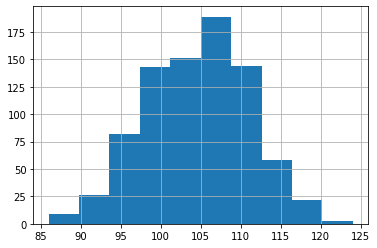

In [9]:
df['Full-flowering date (DOY)'].hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot:>

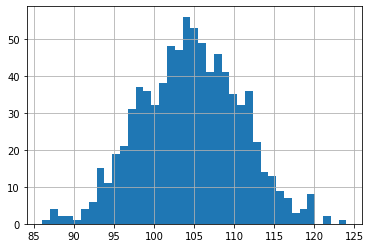

In [10]:
df['Full-flowering date (DOY)'].hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [11]:
df['Full-flowering date (DOY)'].describe()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: Full-flowering date (DOY), dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [12]:
df[df.AD < 1900]['Full-flowering date (DOY)'].mean()

105.20728291316527

## 11. How about after 1900?

In [13]:
df[df.AD > 1900]['Full-flowering date (DOY)'].mean()


100.3125

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [14]:
len(df[df['Data type code'] == 4])

39

## 13. Display the rows where our data was from a title in Japanese poetry

In [ ]:
df[df['Data type code'] == 4]

## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot:>

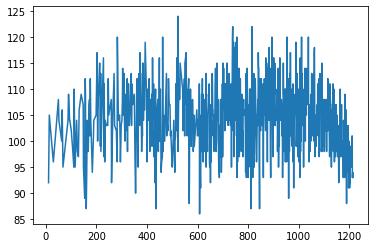

In [16]:
df['Full-flowering date (DOY)'].plot()

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [17]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean()

11        NaN
14        NaN
30        NaN
50        NaN
52      101.0
        ...  
1210     95.9
1211     96.9
1212     96.4
1213     96.6
1214     96.0
Name: Full-flowering date (DOY), Length: 827, dtype: float64

In [18]:
df['rolling'] = df.rolling(20, on='AD', min_periods=5)[
    'Full-flowering date (DOY)'].mean()


Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

<AxesSubplot:>

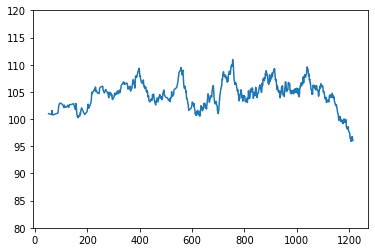

In [19]:
df['rolling'].plot(x='AD', y='Full-flowering date (DOY)', ylim=(80, 120))

## 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime`, if pandas doesn't figure it out automatically you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [20]:
df['month'] = pd.to_datetime(
    df['Full-flowering date'], format="%m%d", errors='coerce').dt.strftime("%B")


## 17. Using your new column, how many blossomings happened in each month?

In [21]:
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

## 18. Make a bar graph of how many blossomings happened in each month.

<AxesSubplot:>

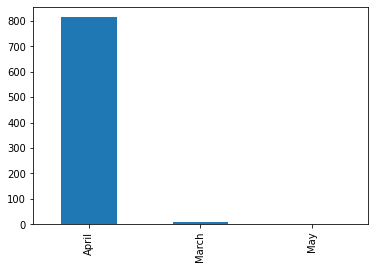

In [22]:
df['month'].value_counts().plot(kind='bar')

## 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.`

*Tip: If you didn't drop the rows missing full-flowering dates earlier, it will yell at you about missing data. Go back up and fix Number 6!*

In [23]:
df['day_of_month'] = pd.to_datetime(df['Full-flowering date'], format="%m%d", errors='coerce').dt.strftime("%d")


In [24]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,rolling,month,day_of_month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,April,01
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,April,15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,April,06
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.0,April,14


## 20. Adding a date column

If you don't have a nice-looking date column yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new column called `'date'`. By "nice looking," I mean it should say something like `April 11`.

* Instead of using the two existing columns, you could learn to use `.dt.strftime` as mentioned above.

In [25]:
df['date'] = pd.to_datetime(df['Full-flowering date'], format="%m%d", errors='coerce').dt.strftime("%B %-d")
df.head()


,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,rolling,month,day_of_month,date
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,April,01,April 1
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,April,15,April 15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,April,06,April 6
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,18,April 18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.0,April,14,April 14


## 21. What day of the week do cherry blossoms like to blossom on?

Do they get the weekends off?

<AxesSubplot:>

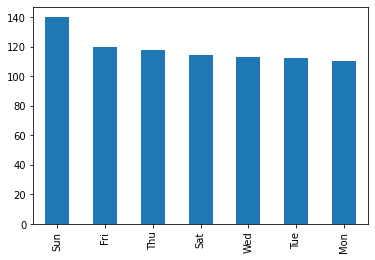

In [26]:
pd.to_datetime(df['Full-flowering date'], format="%m%d").dt.strftime("%a").value_counts().plot(kind='bar')


Cherry Blossoms work on Sundays.

# YOU ARE DONE.

And **incredible.**

I feel credible, more than anything. But thank you.